# Chapter15. OpenCV이용 및 이미지 데이터 전처리
> 15장의 예제 실행 전 아래의 코드를 실행할 것

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import time

%matplotlib inline

def aidemy_imshow(name, img):
    b,g,r = cv2.split(img)
    img = cv2.merge([r,g,b])
    plt.imshow(img)
    plt.show()

cv2.imshow = aidemy_imshow

-----------------------------------
## 15.1. 이미지 데이터 기초
-----------------------------------
### 15.1.1. RGB 데이터
   - 컬러 이미지 (R,G,B) = (Red,Green,Blue), 8bit(0~255) value로 나타냄
   - 흑백 이미지 - 단순히 픽셀의 밝기 정보만 가짐(RGB 데이터량의 1/3)
   - Red = (255,0,0)
   - Green = (0,255,0)
   - Blue = (0,0,255)
   - Magenta = (255,0,255)
   - Black = (0,0,0)
   - White = (255,255,255)
   - OpenCV에서는, 하나의 Pixel을 나타내기 위한 요소 수를 **_채널수_** 라고 한다.
   - RGB Image는 채널 수가 3이며, 흑백 이미지는 채널 수가 1이다.
   
### 15.1.2. 이미지 데이터 형식
   - PNG : 무손실 압축가능/다양한 색상재현
   - JPG : 다양한 색상재현/손실압축
   - PDF : 고화질, 고용량
   - GIF : 재현색은 적지만, 용량이 작다. 애니매이션 표현가능
   
### 15.1.3. 투명 데이터
   - 이미지의 배경을 투명하게 하려면 : SW를 사용한 수정, 이미지 작성 단계에서 투명효과 적용, OpenCV적용도 가능
   - 기본적으로 투명 처리는 프로그램이 색상을 취급하는 방법에 따라 달라짐
   - 이미지 자체로 투명 효과를 지원하는 것은 GIF와 PNG임
-----------------------------------
## 15.2. OpenCV기초
-----------------------------------
### 15.2.1. 이미지를 읽어 출력하기
   - OpenCV는 이미지를 다루는 데 유용한 라이브러리이다

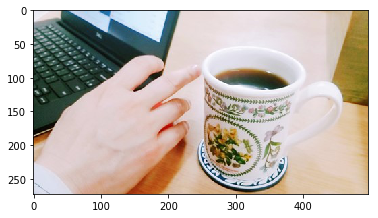

In [3]:
# 15-2/15-3 이미지를 읽어 출력한 예
# 미리 'cleansing_data'폴더를 실행 파일과 같은 폴더(주피터노트북 소스 코드가 저장된 폴더)에 만들고, 
# 15장의 샘플 파일인 'sample.jpg'를 폴더에 넣어주세요
# import합니다.
import numpy as np
import cv2

# 이미지를 읽습니다
# cleansing_data폴더에 sample.jpg가 존재할 때의 코드입니다.
img = cv2.imread("cleansing_data/sample.jpg")

# sample은 창 이름입니다.
cv2.imshow("sample",img)

### 15.2.2. 이미지를 만들어 저장하기
   - cv2에서는 이미지를 RGB순서가 아니라 [B,G,R]순서로 처리함에 주의
   - for _ in range : _ 는 for반복문 내에서 _ 에 해당하는 변수를 사용하지 않을 때 지정함
   - 첫 번째 for문은 가로로 512, 두 번째 for문은 세로로 512 크기의 이미지를 생성하는 다중 루프

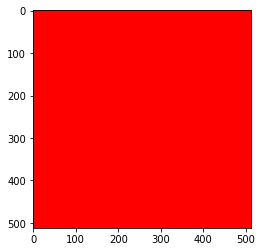

True

In [4]:
# 15-5 이미지를 만들어 저장하는 예
import numpy as np
import cv2

# 이미지의 크기를 결정합니다. img_size = (height, width) = (sero, garo) = (vertical, horizontal)
img_size = (512, 512)

# 이미지 정보를 가지는 행렬을 만듭니다
# 빨간색 이미지이므로, 각 요소가 (BGR), [0,0,255]인 512x512의 행렬을 만듭니다.

# 행렬이 전치되는 점에 주의합니다.
# 이미지 데이터의 각 요소는 0~255값만 지정 가능합니다.
# 이를 명시하기 위해 dtype옵션으로 데이터형을 지정합니다.
my_img = np.array(
    [
        [
            [0,0,255]
            for _ in range(img_size[1])     # 이미지의 가로 사이즈 정보를 먼저 반복
        ] 
        for _ in range(img_size[0])         # 이미지의 세로 사이즈를 나중에 반복
    ], 
    dtype="uint8"
)

# 표시합니다.
cv2.imshow("sample", my_img)

# 저장합니다.
# 파일명 my_img.jpg
cv2.imwrite("my_red_img.jpg", my_img)

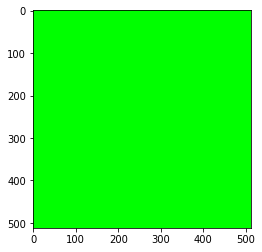

True

In [5]:
# 15-6
import numpy as np
import cv2

# 이미지의 크기를 결정합니다.
sero = 512
garo = 512
#img_size = (sero, garo)

# 512 x 512 크기의 녹색 이미지를 만드세요
my_img2 = np.array(                   # numpy array 생성
    [
        [
            [0,255,0]                 # Pixel의 BGR값 쓰고
            for _ in range(garo)      # 가로만큼 반복
        ]                             # 묶고
        for _ in range(sero)          # 세로만큼 반복
    ],                                # 묶고
    dtype="uint8"                     # 8bit unsigned int형지정
)

cv2.imshow("sample2",my_img2)
cv2.imwrite("my_green_img.jpg",my_img2)

### 15.2.3. 트리밍과 리사이즈
   - 트리밍trimming은 이미지의 일부를 잘라내는 작업
   - 리사이즈resize는 이미지의 크기를 변경(확대/축소)하는 작업

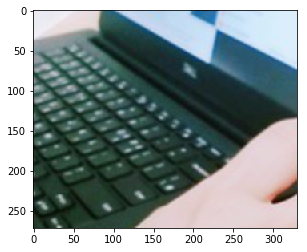

리사이즈로 이미지를 축소하여 화소수를 낮춘 뒤 원래 크기로 복원하면 모자이크 처리를 할 수 있습니다


In [6]:
# 15-8
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")
size = img.shape

# 이미지를 나타내는 행렬의 일부를 꺼내면, 그것이 trimming이 됩니다.
# n등분 하려면, 가로와 세로의 크기를 나눕니다.
my_img = img[: size[0] //2, : size[1] // 3]

# 여기에서는 원래의 배율을 유지하면서 폭과 높이를 각각 2배로 합니다. 
# 크기를 지정할 때는 (폭, 높이)순서임을 유의하세요
my_img = cv2.resize(my_img, (my_img.shape[1]*2, my_img.shape[0]*2))

cv2.imshow("sample", my_img)
print("리사이즈로 이미지를 축소하여 화소수를 낮춘 뒤 원래 크기로 복원하면 모자이크 처리를 할 수 있습니다")

size[0]:  273 	size[1]:  497


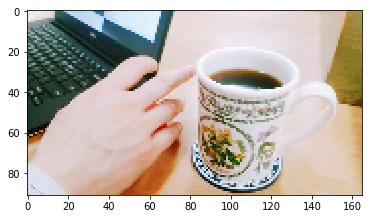

In [7]:
# 15-9 sample.jpg의 폭과 높이를 각각 1/3로 리사이즈하세요
import numpy as np
import cv2

# 1. image load
img = cv2.imread("cleansing_data/sample.jpg")
# 2. read image size(shape)
size = img.shape
print("size[0]: ",size[0],"\tsize[1]: ",size[1])
sero = size[0]
garo = size[1]

# 3. trimming
#my_img = cv2.resize(img, (img.shape[1]//3, img.shape[0]//3))
#my_img = img[:sero //3, :garo//3]
#my_img = cv2.resize(img, (img.shape[1]//3, img.shape[0]//3))
my_img = cv2.resize(img, (garo//3, sero//3))
cv2.imshow("sample", my_img)


### 15.2.4. 회전 및 반전
   - 이미지를 회전할 때 : cv2.wrapAffine() 함수를 사용하여 아핀 변환을 한다.

Toggle code

* Affine Transform : 모든 아핀 변환은 이동, 회전, 크기조절, 반사, 층밀림 5가지 합성변환으로 표현 가능

	- 행렬 A에 의해, 행렬변환한 후에, 평행이동한 것과 동일
	- 변환 전후에, 직선은 직선으로, 다각형은 다각형으로, 곡면은 곡면으로, 평행 선분은 평행으로 유지됨


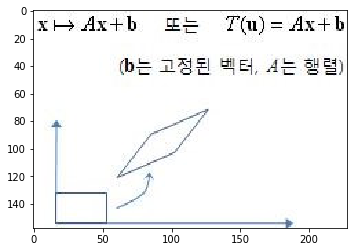

In [8]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)
#---------------------------------------------------------------------------------------------------------
import numpy as np
import cv2

print("* Affine Transform : 모든 아핀 변환은 이동, 회전, 크기조절, 반사, 층밀림 5가지 합성변환으로 표현 가능\n")
print("\t- 행렬 A에 의해, 행렬변환한 후에, 평행이동한 것과 동일")
print("\t- 변환 전후에, 직선은 직선으로, 다각형은 다각형으로, 곡면은 곡면으로, 평행 선분은 평행으로 유지됨")

affine_img = cv2.imread("cleansing_data/affine_transform.jpg")
cv2.imshow("affine", affine_img)

###  
   - 이 때 필요한 행렬은 cv2.getRotationMatrix2D로 얻을 수 ㅣㅇㅆ다.
   - 반전에는 cv2.flip(이미지, 대상 축) 함수를 사용한다

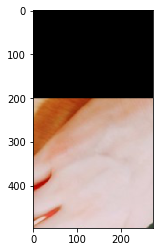

In [9]:
# 15-11 회전 및 반전의 예
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# warpAffine()함수 사용에 필요한 행렬을 만듭니다
# 첫 번째 인수는 회전의 중심입니다. (여기서는 이미지의 중심을 설정)
# 두 번째 인수는 회전 각도입니다. (여기서는 180도를 설정)
# 세 번째 인수는 배율입니다. (여기서는 2배 확대로 설정)
mat = cv2.getRotationMatrix2D(tuple(np.array(img.shape[:2]) /2), 180, 2.0)

# 아핀 변환을 합니다.
# 첫 번째 인수는 변환하려는 이미지입니다.
# 두 번째 인수는 위에서 생성한 행렬(mat)입니다.
# 세 번쨰 인수는 사이즈입니다.
my_img = cv2.warpAffine(img, mat, img.shape[:2])

cv2.imshow("sample", my_img)

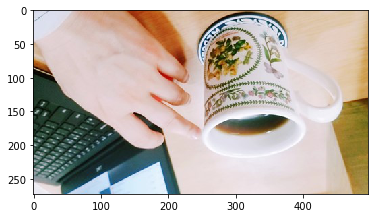

x축을 중심으로



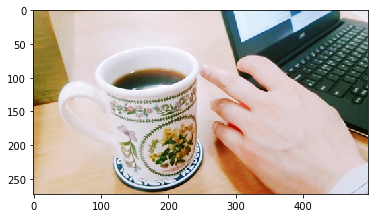

y축을 중심으로



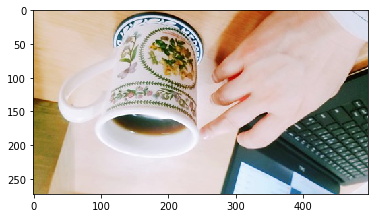

두 축을 중심으로



In [10]:
# 15-12 : cv2.filp()함수를 사용하여 이미지를 x축을 중심으로 반전시키세요
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# cv2.flip()함수는 인수가 0일 때는 x축을 중심으로, 양수일 떄는 y축을 중심으로, 음수일 때는 두 축을 중심으로 반전
my_img0 = cv2.flip(img,0)
my_img1 = cv2.flip(img,1)
my_img2 = cv2.flip(img,-1)
cv2.imshow("sample", my_img0)
print("x축을 중심으로\n")
cv2.imshow("sample", my_img1)
print("y축을 중심으로\n")
cv2.imshow("sample", my_img2)
print("두 축을 중심으로\n")

### 15.2.5. 색조 변환 및 색상 반전
   - RGB를 다른 색 공간으로 변환 : Lab색공간(인간의 시각에 근접하게 설계)

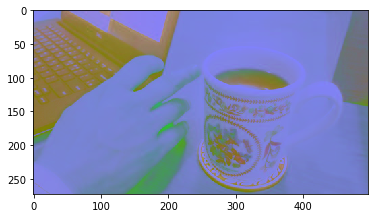

COLOR_RGB2LAB


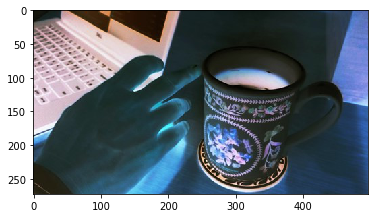

이미지의 색상을 반전 : 네거티브 반전


In [11]:
# 15-14 색조 변환 및 색상 반전의 예
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# 색 공간을 변환합니다
my_img0 = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
cv2.imshow("sample",my_img0)
print("COLOR_RGB2LAB")

# 네거티브 반전
my_img1 = cv2.bitwise_not(img)
cv2.imshow("sample2",my_img1)
print("이미지의 색상을 반전 : 네거티브 반전")

#my_img1 = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#cv2.imshow("sample1",my_img1)

(273, 497, 3)
sero		: 273
garo		: 497

len(img)	: 273 (heigth)
len(img[0])	: 497 (width)
len(img[1])	: 497 (width)
len(img[2])	: 497 (width)
	.....
len(img[0][0])	: 3 (ch)
len(img[0][1])	: 3 (ch)
	.....
img[0][0][0]	: 244 (value)
img[0][0][1]	: 234 (value)


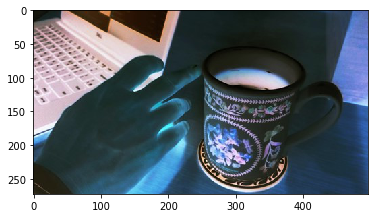

cv2.bitwise_not(img)


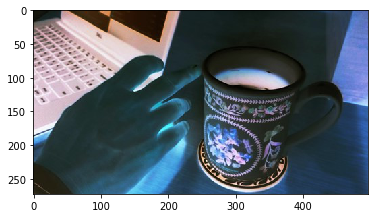

for loop bit color inverse
 [[[ 11  21  15]
  [ 11  21  15]
  [ 12  21  18]
  ...
  [179 106  84]
  [175 100  78]
  [175 102  82]]

 [[ 12  21  18]
  [ 12  21  18]
  [ 12  21  18]
  ...
  [176 103  81]
  [177 102  80]
  [175 102  82]]

 [[ 12  21  18]
  [ 12  21  18]
  [ 13  22  19]
  ...
  [176 103  81]
  [180 107  85]
  [181 108  88]]

 ...

 [[ 34  48  54]
  [ 32  46  52]
  [ 29  43  49]
  ...
  [ 96  63  37]
  [100  66  37]
  [101  65  35]]

 [[ 36  50  56]
  [ 34  48  54]
  [ 31  45  51]
  ...
  [ 96  63  37]
  [100  66  37]
  [105  69  39]]

 [[ 73  89 106]
  [ 33  48  64]
  [ 32  48  61]
  ...
  [ 96  64  35]
  [ 98  66  37]
  [106  68  38]]]


In [12]:
# 15-15 
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")
print(img.shape)

sero = img.shape[0]
garo = img.shape[1]

print("sero\t\t:", sero)
print("garo\t\t:", garo)
print()
print("len(img)\t:",len(img),"(heigth)")
print("len(img[0])\t:",len(img[0]),"(width)")
print("len(img[1])\t:",len(img[1]),"(width)")
print("len(img[2])\t:",len(img[2]),"(width)")
print("\t.....")
print("len(img[0][0])\t:",len(img[0][0]),"(ch)")
print("len(img[0][1])\t:",len(img[0][1]),"(ch)")
print("\t.....")
print("img[0][0][0]\t:",img[0][0][0], "(value)")
print("img[0][0][1]\t:",img[0][0][1], "(value)")

my_img1 = cv2.bitwise_not(img)
cv2.imshow("bitwise print",my_img1)
print("cv2.bitwise_not(img)")

for i in range(len(img)):
    for j in range(len(img[i])):
        for k in range(len(img[i][j])):
            img[i][j][k] = 255 - img[i][j][k]
            
my_img2 = img
cv2.imshow("forloop print",my_img2)
print("for loop bit color inverse\n",my_img2)

## 15.2. OpenCV이용
### 15.3.1. 임곗값 처리(이진화)
   - 임곗값처리 : 이미지 용량감소를 위해 일정 이상으로 밝거나 어두운 것을 모두 같은값으로 만드는 것
   - cv2.threshols() 함수를 사용하여 구현함
   
   **반환변수, 이미지 변수 = cv2.threshold(input image, threshold, max value, cv2.THRESH_인수)**

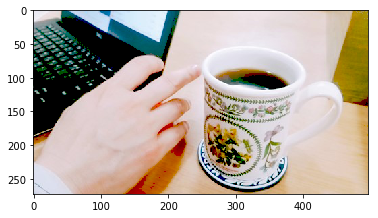

retval	: 75.0


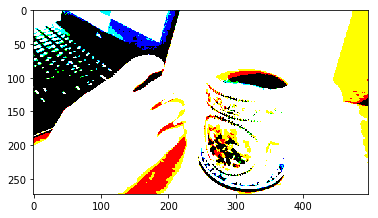

retval	: 100.0


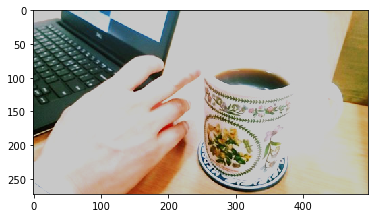

retval	: 200.0


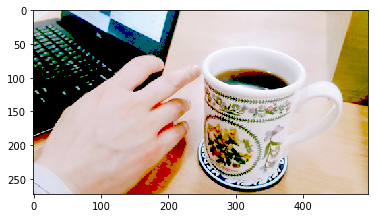

retval	: 90.0


In [49]:
# 15-17 임곗값 처리의 예
import numpy as np
import cv2

img = cv2.imread("cleansing_data/sample.jpg")

# 첫 번째 인수는 처리하는 이미지입니다.
# 두 번째 인수는 임곗값입니다.
# 세 번째 인수는 최댓값(maxvalue)입니다.
# 네 번째 인수는 THRESH_BINARY, THRESH_BINARY_INV, THRESH_TOZERO, THRESH_TRUNC, THRESH_TOZERO_INV중 하나입니다.
# 다음은 네 번째 인수에 대한 설명입니다.

# THRESH_BIBARY     : 픽셀값이 임곗값을 초과하는 경우, 해당 픽셀을 maxValue로 하고, 그 외의 경우 0(검은색)으로 합니다.
# THRESH_BINARY_INV : 픽셀값이 임곗값을 초과하는 경우 0으로 설정하고, 그외의 경우 maxValue로 합니다.
# THRESH_TRUNC      : 픽셀값이 임곗값을 초과하는 경우, 임곗값으로 설정하고, 그 외의 경우에는 변경하지 않습니다.
# THRESH_TOZERO     : 픽셀값이 임곗값을 초과하는 경우, 변경하지 않고, 그 외의 경우에는 0으로 설정합니다.
# THRESH_TOZERO_INV : 픽셀값이 임곗값을 초과하는 경우 0으로 설정하고, 그 외의 경우에는 변경하지 않습니다.

# 임곗값을 75로, 최댓값을 255로 하여 THRESH_TOZERO를 적용합니다.
# 임곗값도 반환되므로, retval로 돌려받습니다.
# 반환변수, 이미지 변수 = cv2.threshold(input image, threshold, max value, cv2.THRESH_인수)
retval, my_img = cv2.threshold(img, 75, 255, cv2.THRESH_TOZERO)
cv2.imshow("sample",my_img)
print("retval\t:",retval)

# 반환변수, 이미지 변수 = cv2.threshold(input image, threshold, max value, cv2.THRESH_인수)
retval, my_img1 = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
cv2.imshow("sample1",my_img1)
print("retval\t:",retval)

# 반환변수, 이미지 변수 = cv2.threshold(input image, threshold, max value, cv2.THRESH_인수)
retval, my_img2 = cv2.threshold(img, 200, 205, cv2.THRESH_TRUNC)
cv2.imshow("sample2",my_img2)
print("retval\t:",retval)

# 반환변수, 이미지 변수 = cv2.threshold(input image, threshold, max value, cv2.THRESH_인수)
retval, my_img3 = cv2.threshold(img, 90, 180, cv2.THRESH_TOZERO)
cv2.imshow("sample2",my_img3)
print("retval\t:",retval)


### 15.3.2. 마스킹
   - 마스크용 이미지 : 채널수가 1인 흑백 이미지

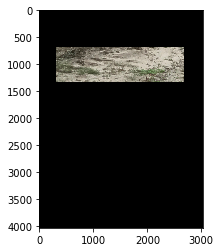

In [14]:
# 15-20 마스킹의 예
# 미리 cleansing_data 폴더에 15장의 샘플 mask.png파일을 넣어 두세요.
import numpy as np
import cv2

img = cv2.imread("cleansing_data/org.jpg")

# 두 번째 인수로 0을 지정하면 채널 수가 1인 이미지로 변환해서 읽습니다. (Grayscale자동변환)
mask = cv2.imread("cleansing_data/mask.png", 0)

# 원래 이미지와 같은 크기로 리사이즈합니다.
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))

# 세 번째 인수로 마스크용 이미지를 선택합니다.
my_img = cv2.bitwise_and(img, img, mask = mask)

cv2.imshow("sample", my_img)


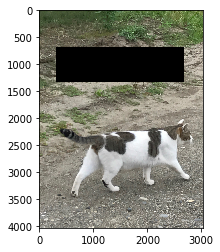

In [15]:
# 15-21
import numpy as np
import cv2

img = cv2.imread("cleansing_data/org.jpg")
mask = cv2.imread("cleansing_data/mask.png", 0)
mask = cv2.resize(mask, (img.shape[1], img.shape[0]))  # 원영상의 가로, 세로 크기에 맞게 mask를 리사이즈

# cv2.threshold()함수로 이미지 반전
retval, mask = cv2.threshold(mask, 0, 255, cv2.THRESH_BINARY_INV)
# cv2.bitwise_and()함수로 마스크 처리
my_img = cv2.bitwise_and(img, img, mask = mask)
cv2.imshow("sample", my_img)

### 15.3.3. 흐림
   - 이미지를 흐리게 하려면, 픽셀 주위 nxn개 (마스크 크기) 픽셀과의 평균을 취합니다.
   - 흐림(블러blur)효과는 GaussianBlur()함수를 사용합니다.

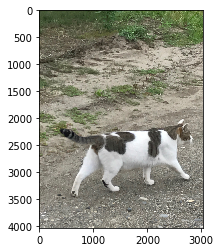

In [16]:
# 15-23 : 흐림 효과 적용의 예
import numpy as np
import cv2

img = cv2.imread("cleansing_data/org.jpg")

# 첫 번째 인수는 원본 이미지
# 두 번째 인수는 nxn 마스크 크기의 n값 (n은 홀수)
# 세 번째 인수는 x축 방향의 편자(일반적으로 0으로 지정)
my_img = cv2.GaussianBlur(img, (5,5),0)
cv2.imshow("sample", my_img)

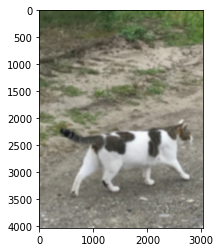

In [17]:
# 15-24 
import numpy as np
import cv2

img = cv2.imread("cleansing_data/org.jpg")

# 첫 번째 인수는 원본 이미지
# 두 번째 인수는 nxn 마스크 크기의 n값 (n은 홀수)
# 세 번째 인수는 x축 방향의 편자(일반적으로 0으로 지정)
my_img = cv2.GaussianBlur(img, (101,101),0)
cv2.imshow("sample", my_img)

### 15.3.4. 노이즈 제거
   - 노이즈를 제거할 때는 cv2.fastNlMeansDenoisingColored()함수를 사용한다.

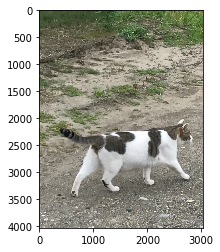

In [18]:
# 15-26 : 노이즈 제거의 예 
import numpy as np
import cv2

img = cv2.imread("cleansing_data/org.jpg")
my_img = cv2.fastNlMeansDenoisingColored(img)

cv2.imshow("sample",my_img)

### 15.3.5. 팽창 및 침식
   - 팽창dilation과 침식erosion은 주로 이진 이미지로 처리된다.
   - 어떤 한 픽셀을 중심으로 두고, 필터 내 최대값을 중심값으로 하는 것을 팽창, 반대로 최소값을 중심으로 하는 것을 침식이라고 한다.
   - 팽창에는 cv2.dilate()함수를, 침식에는 cv2.erode()함수를 사용한다.
   - np.uint8은 8비트로 표현된 부호 없는 정수unsigned int

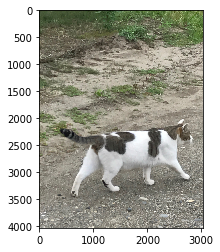

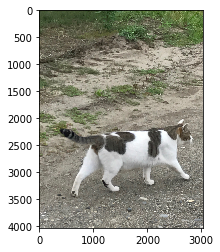

In [19]:
# 15-27 ~ 15-29 : 팽창의 예
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("cleansing_data/org.jpg")

# Filter정의
filt = np.array(
    [
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0]
    ], np.uint8)

# 팽창 처리
my_img = cv2.dilate(img, filt)
# 침식 처리
my_img2 = cv2.erode(img, filt)

cv2.imshow("sample", my_img)
cv2.imshow("sample_erode", my_img2)


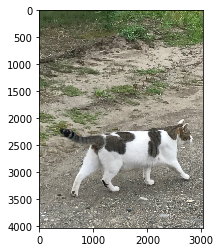

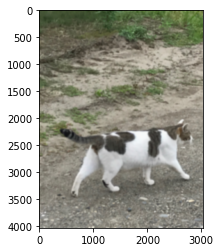

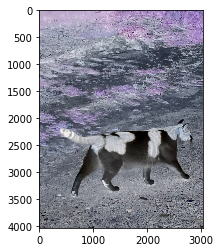

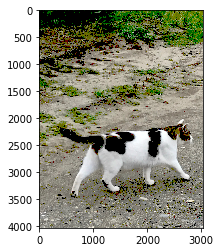

In [20]:
# 15-30 : 연습문제
import cv2
import numpy as np

img = cv2.imread("cleansing_data/org.jpg")

# 원본 이미지를 지정합니다.
cv2.imshow('Original', img)

# 흐림 처리를 구현하세요 (두 번째 인수에 77, 77을 지정하세요)
blur_img = cv2.GaussianBlur(img, (77,77),0)
cv2.imshow('Blur', blur_img)

# 이미지의 색상을 반전시키세요
bit_img = cv2.bitwise_not(img)
cv2.imshow('Bit', bit_img)

# 임곗값 처리를 하세요. 임계값을 90으로 하고, 그 이하면 변경하지 않고, 그 이상이면 0으로 하세요
retval, thre_img = cv2.threshold(img, 90,255,cv2.THRESH_TOZERO)
cv2.imshow('THRESH', thre_img)

### 데이터 부풀리기
   - 머신러닝의 이미지 인식 : 이미지 데이터 및 대응하는 라벨의 조합이 대량 필요
   - 이미지를 뒤집거나 좌우로 조금씩 이동시켜 새로운 데이터를 만들어 내는 것
   - 이미지 가공 방법 (옵션)
      * def scratch_image(img, flip=True, thr=True, filt=True, resize=True, erode=True):
      * *flip 은 이미지의 좌우 반전
      * *thr 은 임곗값 처리
      * *filt 는 흐림 효과
      * *resize 는 모자이크 처리
      * *erode 은 침식 여부 지정
      * img의 형식은 OpenCV의 cv2.read()로 읽은 이미지 데이터의 형태입니다.
        부풀려진 이미지 데이터를 한꺼번에 배열로 반환합니다.

In [30]:
# 15-32 : 종합문제
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

def scratch_image(img, flip=True, thr=True, filt=True, resize=True, erode=True):
    #----------------------------------------------------------------------------
    # 부풀리기에 사용할 방법을 배열에 정리합니다
    methods = [flip, thr, filt, resize, erode]
    
    # 이미지 크기를 취득해서 흐림 효과에 사용되는 필터를 만듭니다.
    img_size = img.shape
    filter1 = np.ones((3, 3))
    print("filter1 :\n", filter1)
    
    # 원본 이미지 데이터를 배열에 저장합니다.
    images = [img]
    
    # 부풀리기에 이용하는 함수입니다.
    scratch = np.array([
        lambda x: cv2.flip(x, 1),
        lambda x: cv2.threshold(x, 100, 255, cv2.THRESH_TOZERO)[1],
        lambda x: cv2.GaussianBlur(x, (5, 5), 0),
        lambda x: cv2.resize(cv2.resize(x, (img_size[1]//5, img_size[0]//5)),(img_size[1], img_size[0])),
        lambda x: cv2.erode(x, filter1)
    ])
    
    # 함수와 이미지를 인수로 받아서 가공된 이미지를 부풀리는 함수입니다.
    doubling_images = lambda f, imag: np.r_[imag, [f(i) for i in imag]]
    
    # methods가 True인 함수로 부풀리기를 실시합니다.
    for func in scratch[methods]:
        images = doubling_images(func, images)
    
    return images
    #----------------------------------------------------------------------------
    
# 이미지를 읽습니다.
#cat_img = cv2.imread("claensing_data/cat_sample.jpg")
cat_img = cv2.imread("cleansing_data/cat_sample.jpg")

# 이미지 데이터를 부풀립니다
#scratch_cat_images = scratch_image(cat_img)
scratch_cat_images = scratch_image(cat_img)

# 이미지를 저장할 폴더를 만듭니다.
if not os.path.exists("scratch_images"):
    #os.mkdir("scratch_cat_images")
    os.mkdir("scratch_images")
    
for num, im in enumerate(scratch_cat_images):
    # 대상 폴더 "scratch_images/"를 지정하고 번호를 붙여 저장합니다.
    cv2.imwrite("scratch_images/" + str(num) + ".jpg", im)

filter1 :
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [56]:
# 15-34 :리스트 내포를 사용한 부풀리기 구현 (가독성이 나빠지나, Augmentation을 한줄로 정리가능)
filter1= np.ones((3,3))
sc_flip = [
    lambda x: x,
    lambda x: cv2.flip(x, 1)
]
sc_thr = [
    lambda x: x,
    lambda x: cv2.threshold(x, 100, 255, cv2.THRESH_TOZERO)[1]
]
sc_filter = [
    lambda x: x,
    lambda x: cv2.GaussianBlur(x, (5,5), 0)
]
sc_mosaic = [
    lambda x: x,
    lambda x: cv2.resize(cv2.resize(
        x, (img_size[1] // 5, img_size[0] // 5)
        ), (img_size[1], img_size[0]))
]
sc_erode = [
    lambda x: x,
    lambda x: cv2.erode(x, filter2)
]

# Augmentation을 한 줄로 정리할 수 있음
[e(d(c(b(a(img))))) for a in sc_flip for b in sc_thr for c in sc_filter for d in sc_mosaic for e in sc_erode]

[array([[[244, 234, 240],
         [244, 234, 240],
         [243, 234, 237],
         ...,
         [ 76, 149, 171],
         [ 80, 155, 177],
         [ 80, 153, 173]],
 
        [[243, 234, 237],
         [243, 234, 237],
         [243, 234, 237],
         ...,
         [ 79, 152, 174],
         [ 78, 153, 175],
         [ 80, 153, 173]],
 
        [[243, 234, 237],
         [243, 234, 237],
         [242, 233, 236],
         ...,
         [ 79, 152, 174],
         [ 75, 148, 170],
         [ 74, 147, 167]],
 
        ...,
 
        [[221, 207, 201],
         [223, 209, 203],
         [226, 212, 206],
         ...,
         [159, 192, 218],
         [155, 189, 218],
         [154, 190, 220]],
 
        [[219, 205, 199],
         [221, 207, 201],
         [224, 210, 204],
         ...,
         [159, 192, 218],
         [155, 189, 218],
         [150, 186, 216]],
 
        [[182, 166, 149],
         [222, 207, 191],
         [223, 207, 194],
         ...,
         [159, 191, 220],
  

In [58]:
# 15-35 : 종합문제 다른 해답
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

def scratch_image(img, flip=True, thr=True, filt=True, resize=True, erode=True):
    #----------------------------------------------------------------------------
    
    '''
    # 부풀리기에 사용할 방법을 배열에 정리합니다
    methods = [flip, thr, filt, resize, erode]
    
    # 이미지 크기를 취득해서 흐림 효과에 사용되는 필터를 만듭니다.
    img_size = img.shape
    filter1 = np.ones((3, 3))
    print("filter1 :\n", filter1)
    
    # 원본 이미지 데이터를 배열에 저장합니다.
    images = [img]
    
    # 부풀리기에 이용하는 함수입니다.
    scratch = np.array([
        lambda x: cv2.flip(x, 1),
        lambda x: cv2.threshold(x, 100, 255, cv2.THRESH_TOZERO)[1],
        lambda x: cv2.GaussianBlur(x, (5, 5), 0),
        lambda x: cv2.resize(cv2.resize(x, (img_size[1]//5, img_size[0]//5)),(img_size[1], img_size[0])),
        lambda x: cv2.erode(x, filter1)
    ])
    
    # 함수와 이미지를 인수로 받아서 가공된 이미지를 부풀리는 함수입니다.
    doubling_images = lambda f, imag: np.r_[imag, [f(i) for i in imag]]
    
    # methods가 True인 함수로 부풀리기를 실시합니다.
    for func in scratch[methods]:
        images = doubling_images(func, images)
    
    return images
    '''
    # 부풀리기에 사용할 방법을 배열에 정리합니다
    methods = [flip, thr, filt, resize, erode]

    # 이미지 크기를 취득해서 흐림 효과에 사용되는 필터를 만듭니다.
    img_size = img.shape
    filter1 = np.ones((3, 3))

    # 부풀리기에 이용하는 함수입니다.
    scratch = np.array([
        lambda x: cv2.flip(x, 1),
        lambda x: cv2.threshold(x, 100, 255, cv2.THRESH_TOZERO)[1],
        lambda x: cv2.GaussianBlur(x, (5, 5), 0),
        lambda x: cv2.resize(cv2.resize(x, (img_size[1]//5, img_size[0]//5)),(img_size[1], img_size[0])),
        lambda x: cv2.erode(x, filter1)
    ])
    act_scratch = scratch[methods]

    # 메서드를 준비합니다.
    act_num = np.sum([methods])
    form = "0" + str(act_num) + "b"
    cf = np.array([list(format(i, form)) for i in range(2**act_num)])

    # 이미지 변환 작업을 수행합니다.
    images = []
    for i in range(2**act_num):
        im = img
        for func in act_scratch[cf[i]=="1"]:      # bool 인덱스를 참조합니다
            im = func(im)
        images.append(im)
    return images
    #----------------------------------------------------------------------------
    
# 이미지를 읽습니다.
#cat_img = cv2.imread("claensing_data/cat_sample.jpg")
cat_img = cv2.imread("cleansing_data/cat_sample.jpg")

# 이미지 데이터를 부풀립니다
#scratch_cat_images = scratch_image(cat_img)
scratch_cat_images = scratch_image(cat_img)

# 이미지를 저장할 폴더를 만듭니다.
if not os.path.exists("scratch_images"):
    #os.mkdir("scratch_cat_images")
    os.mkdir("scratch_images")
    
for num, im in enumerate(scratch_cat_images):
    # 대상 폴더 "scratch_images/"를 지정하고 번호를 붙여 저장합니다.
    cv2.imwrite("scratch_images/" + str(num) + ".jpg", im)